

 **푸리에 변환(Fourier Transform)**

-  **정의**: 주기적이지 않은 임의의 신호를 주파수 성분으로 분해하는 수학적 방법입니다.
-  주어진 신호 $x(t)$ 를 시간 영역에서 주파수 영역으로 변환할 때 사용하는 변환입니다.
-  연속 푸리에 변환(Continuous Fourier Transform, CFT)은 다음과 같습니다: $X(f)=\int_{-\infty }^{\infty } x(t)e^{-j2\pi ft} dt$
-  이는 신호를 다양한 주파수 성분(복소수 함수)으로 분해하는 역할을 합니다.

 **2.** **이산 푸리에 변환(Discrete Fourier Transform, DFT)**

-  **정의**: 이산화된 신호(디지털 신호)를 푸리에 변환하는 방법입니다.
-  이산 푸리에 변환은 연속적인 신호를 샘플링한 후, 그 샘플에 대해 푸리에 변환을 적용합니다.
-  이산 푸리에 변환(DFT)의 수식은 다음과 같습니다: $X(k)=\sum_{n=0}^{N-1} x(n)e^{-j\frac{2\pi }{N}kn} ,~~k=0,1,2,...,N-1$
-  여기서 NNN은 신호의 샘플 수, kkk는 각 주파수 성분을 의미합니다.

 **3.** **FFT(빠른 푸리에 변환, Fast Fourier Transform)**

-  **정의**: DFT를 효율적으로 계산하는 알고리즘입니다.
-  DFT의 계산 복잡도는 $O(N^2 )$ 인데, FFT는 이 복잡도를 $O(N\log N)$ 으로 낮춥니다.
-  이를 통해 푸리에 변환의 계산 속도가 급격히 빨라져, 실시간 신호 처리에도 사용할 수 있습니다.

**FFT의 원리**

-  FFT는 DFT를 재귀적으로 계산하는 방법으로, 신호를 짝수 인덱스와 홀수 인덱스 부분으로 나눕니다.
-  이 과정을 반복하면 신호를 작은 크기로 분할한 후 계산하고, 이를 재결합하여 최종 결과를 얻습니다.
-  **Cooley\-Tukey 알고리즘**이 대표적인 FFT 알고리즘입니다.


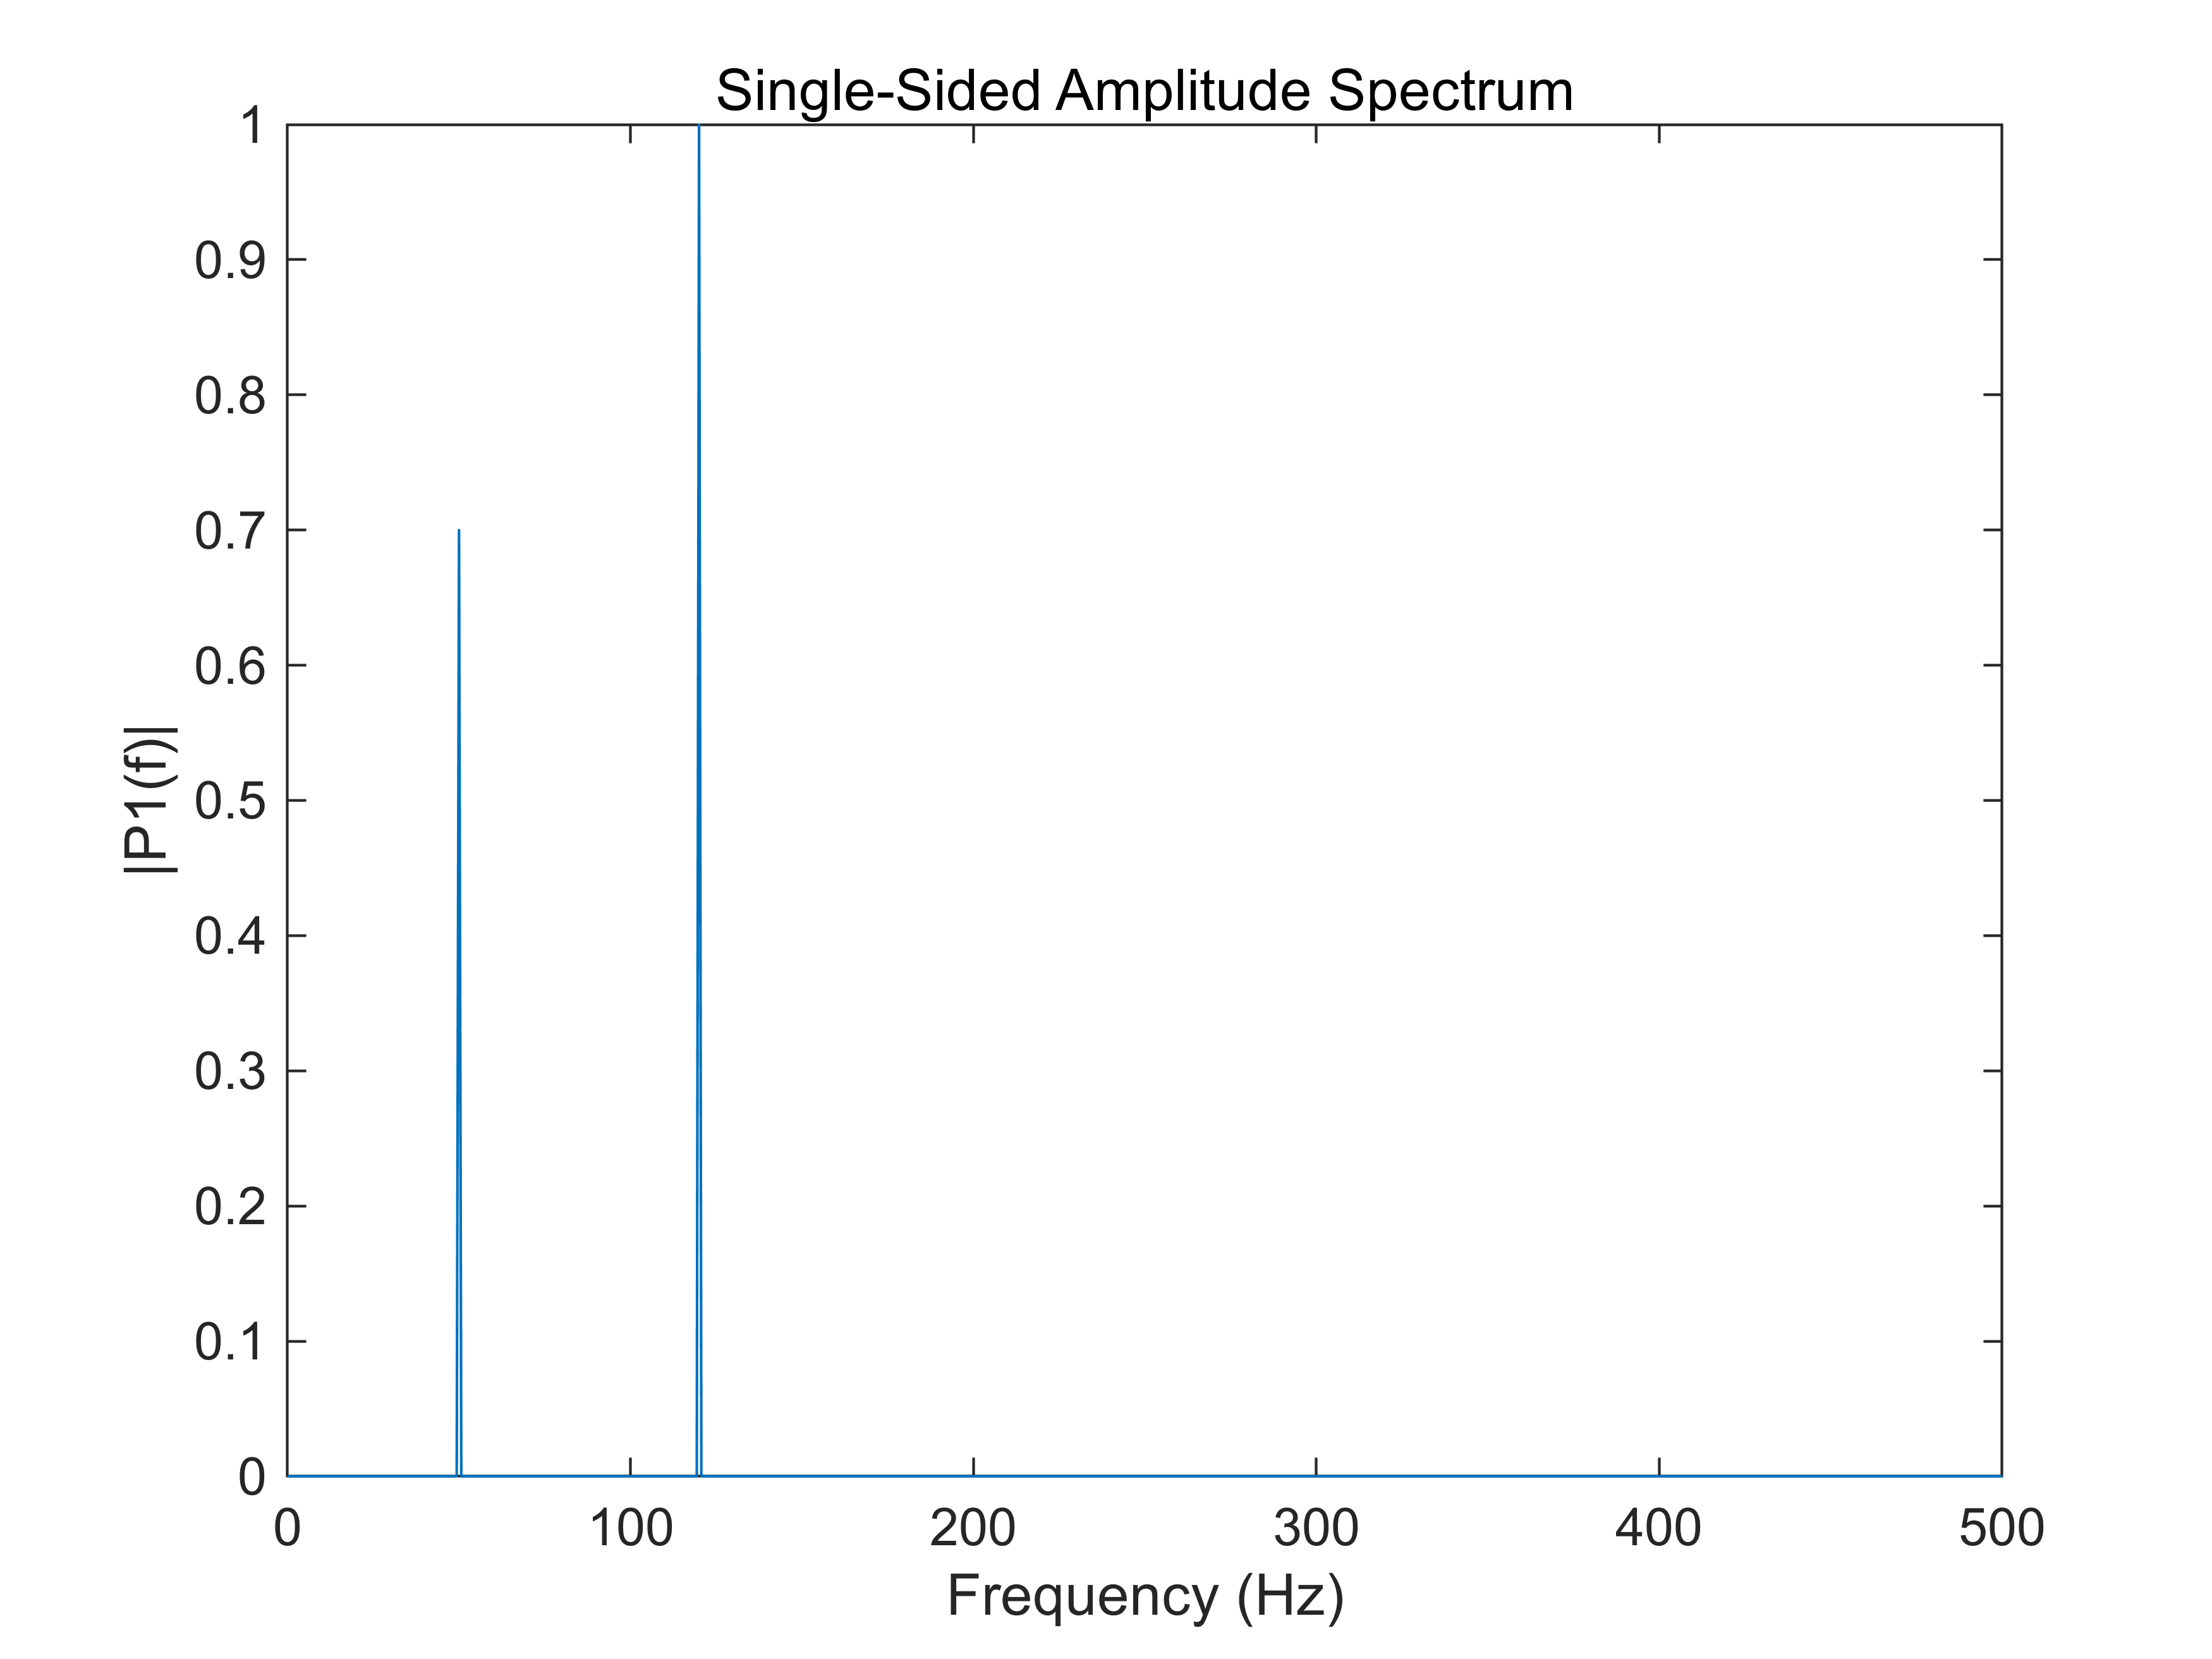

In [1]:
% 샘플 신호 생성
Fs = 1000;         % 샘플링 주파수 (Hz)
T = 1/Fs;          % 샘플링 간격
L = 1500;          % 샘플 수
t = (0:L-1)*T;     % 시간 벡터

% 신호 생성 (예시: 50Hz와 120Hz 사인파의 합)
S = 0.7*sin(2*pi*50*t) + sin(2*pi*120*t);

% FFT 계산
Y = fft(S);

% 주파수 성분 계산
P2 = abs(Y/L);        % FFT 후의 절댓값 계산
P1 = P2(1:L/2+1);     % 대칭성을 이용한 단측 스펙트럼
P1(2:end-1) = 2*P1(2:end-1);

% 주파수 축 계산
f = Fs*(0:(L/2))/L;

% 그래프 그리기
figure;
plot(f, P1);
title('Single-Sided Amplitude Spectrum');
xlabel('Frequency (Hz)');
ylabel('|P1(f)|');


**4.** **역 FFT(IFFT, Inverse Fast Fourier Transform)**

-  **정의**: 주파수 영역에서 시간 영역으로 신호를 변환하는 방법입니다.
-  FFT를 통해 주파수 영역에서 분석된 신호를 다시 시간 영역으로 복구할 때 사용합니다.
-  수학적으로는 다음과 같습니다: $x(n)=\frac{1}{N}\sum_{k=0}^{N-1} X(k)e^{j\frac{2\pi }{N}kn} ,~~n=0,1,2,...,N-1$
-  FFT가 신호를 분해하는 역할을 한다면, IFFT는 그 반대로 신호를 재구성하는 역할을 합니다.


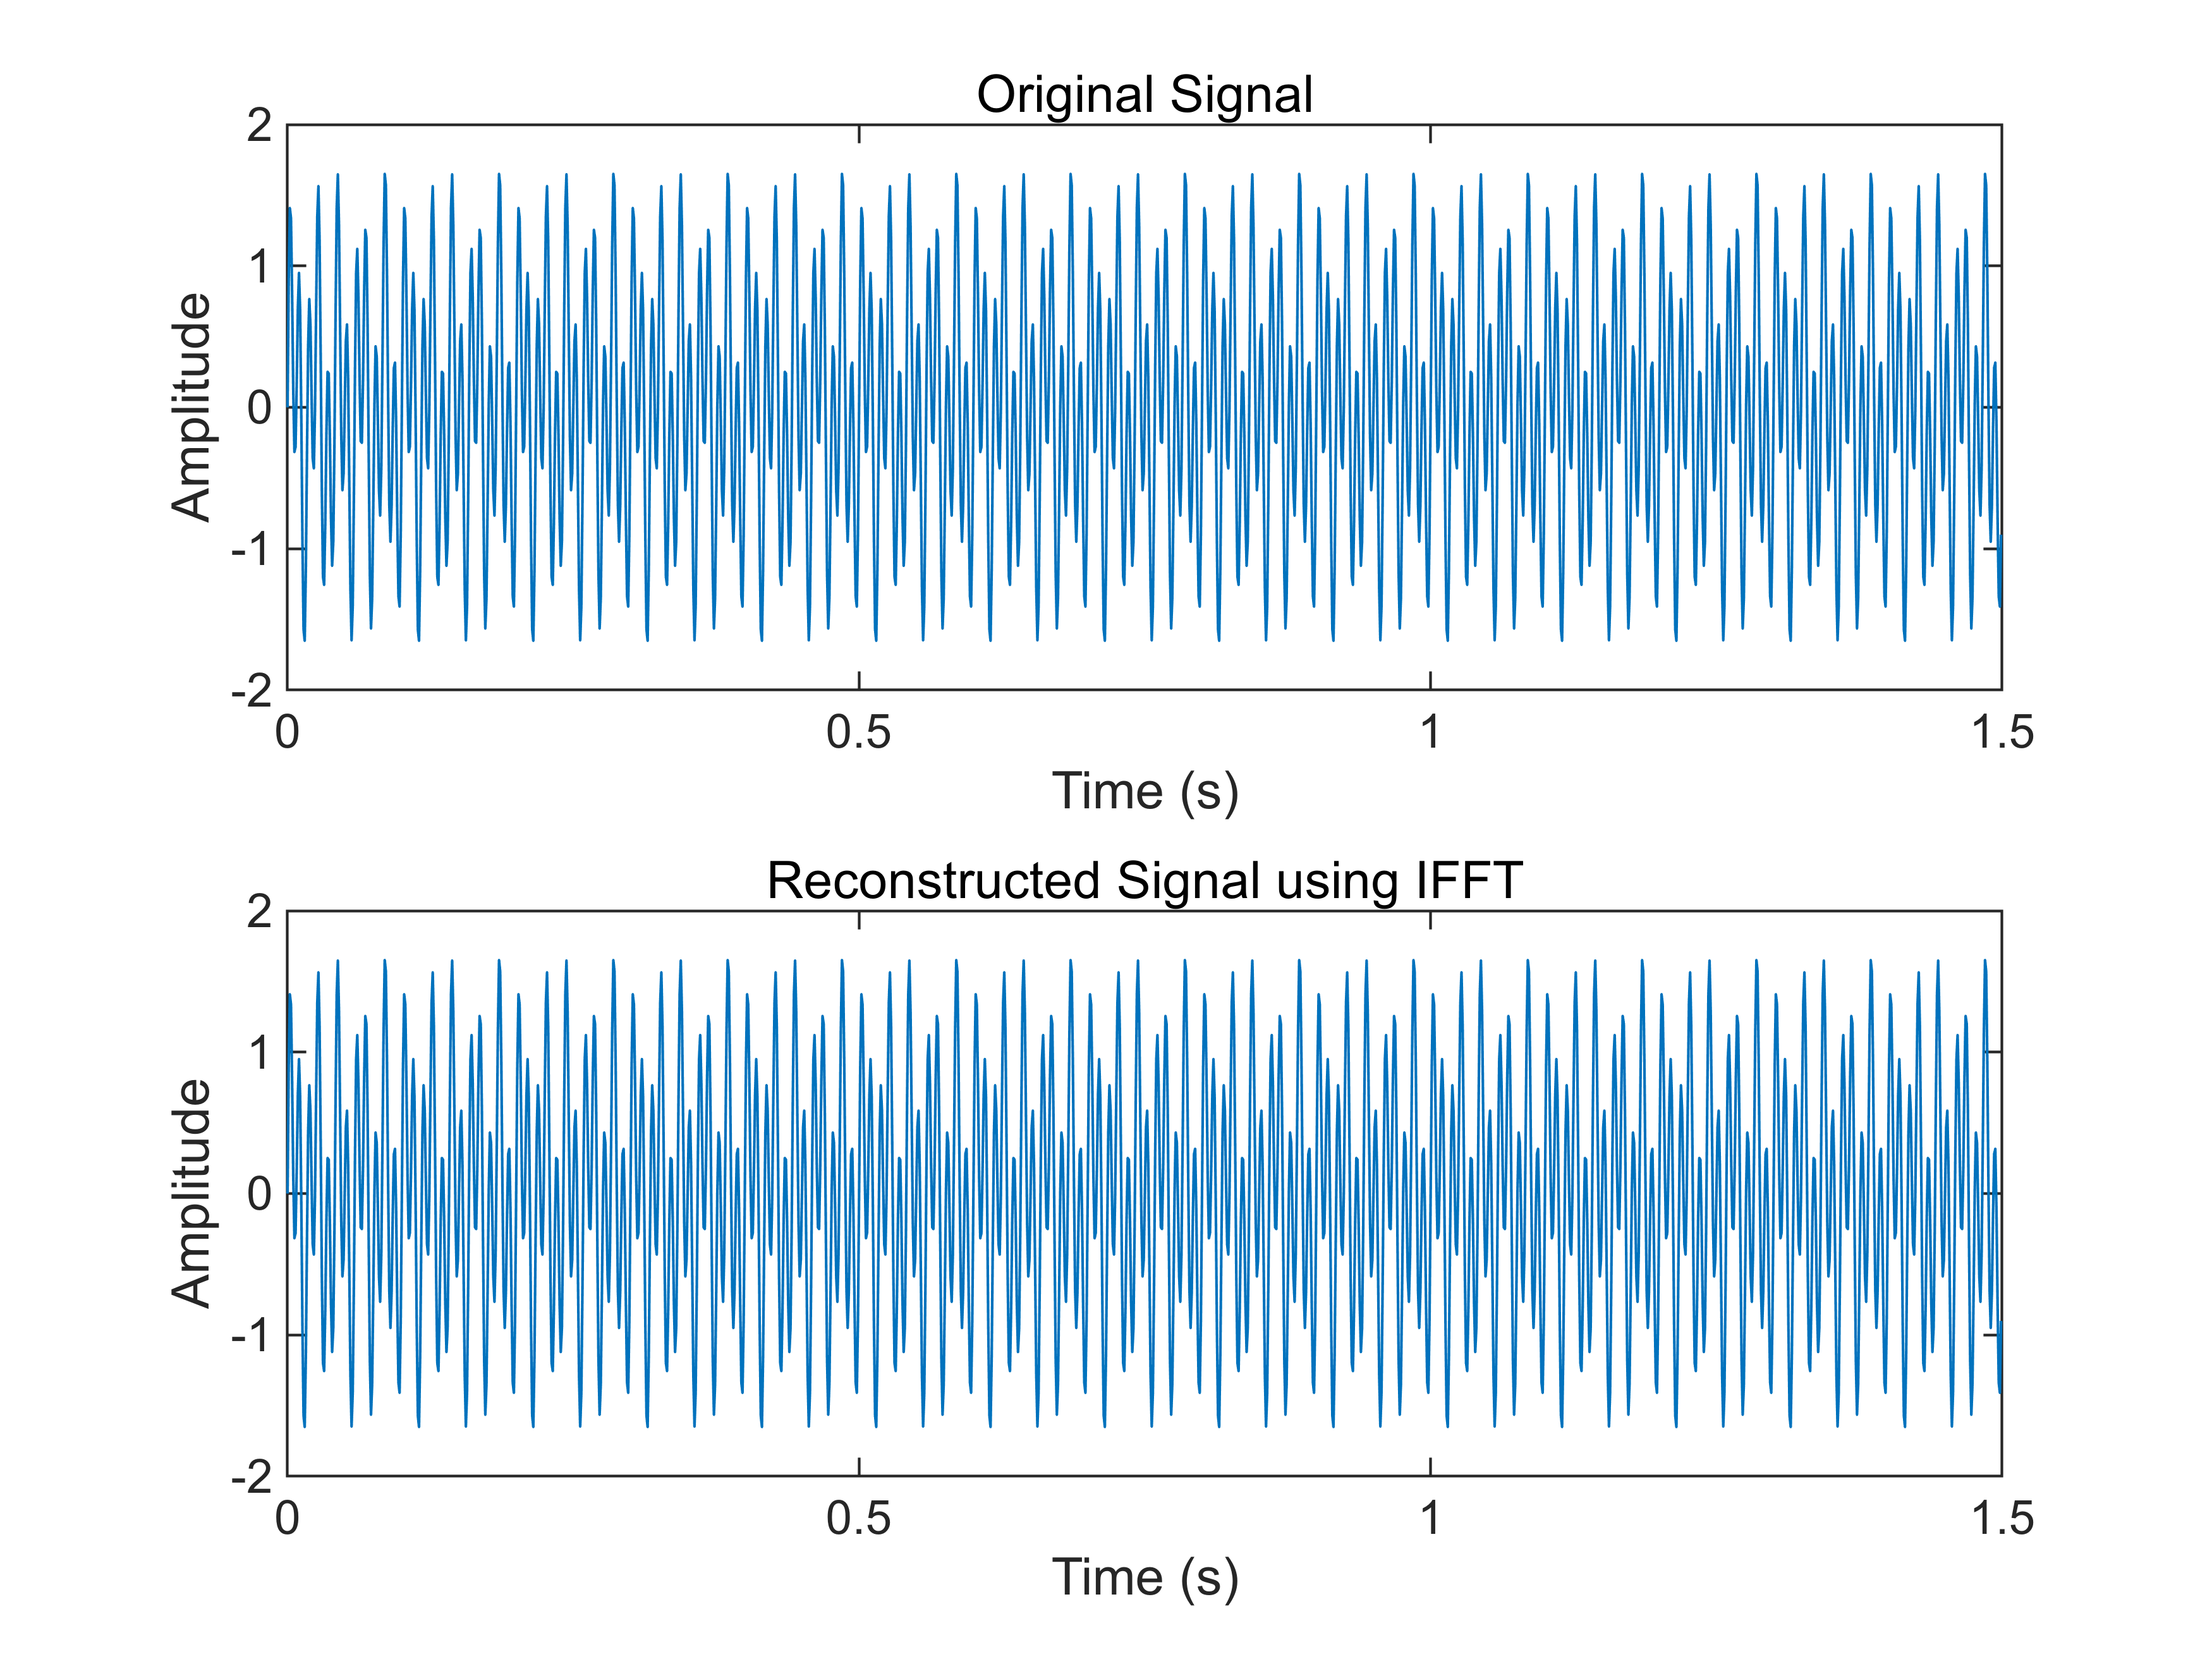

In [2]:
% 신호를 FFT로 변환
Y = fft(S);

% FFT로 변환된 신호를 다시 IFFT로 시간 영역으로 복귀
S_reconstructed = ifft(Y);

% 원 신호와 복원된 신호 비교
figure;
subplot(2,1,1);
plot(t, S);
title('Original Signal');
xlabel('Time (s)');
ylabel('Amplitude');

subplot(2,1,2);
plot(t, real(S_reconstructed));
title('Reconstructed Signal using IFFT');
xlabel('Time (s)');
ylabel('Amplitude');



!!!EndOutputRegion!!!